In [1]:
!pip install spacy scikit-learn pandas PyPDF2

In [15]:
import os

# Print current working directory
print(os.getcwd())


C:\Users\Lenovo\Contacts


In [25]:
import pandas as pd

# Load job descriptions
job_descriptions = pd.read_csv('sample_resumes/Resume/job_descriptions.xlsx.csv')

# Display the first few rows of the DataFrame to check the content
print(job_descriptions.head())


         ID                                         Resume_str  \
0  16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1  22323967           HR SPECIALIST, US HR OPERATIONS      ...   
2  33176873           HR DIRECTOR       Summary      Over 2...   
3  27018550           HR SPECIALIST       Summary    Dedica...   
4  17812897           HR MANAGER         Skill Highlights  ...   

                                         Resume_html Category  
0  <div class="fontsize fontface vmargins hmargin...       HR  
1  <div class="fontsize fontface vmargins hmargin...       HR  
2  <div class="fontsize fontface vmargins hmargin...       HR  
3  <div class="fontsize fontface vmargins hmargin...       HR  
4  <div class="fontsize fontface vmargins hmargin...       HR  


In [26]:
import os
from PyPDF2 import PdfReader

# Function to read PDF files
def read_pdf(file_path):
    with open(file_path, 'rb') as file:
        reader = PdfReader(file)
        text = ''
        for page in reader.pages:
            text += page.extract_text()
    return text

# Path to the accountant resumes folder
accountant_folder_path = 'sample_resumes/data/data/accountant/'

# Read all resumes in the accountant folder
accountant_resumes = {}
for filename in os.listdir(accountant_folder_path):
    if filename.endswith('.pdf'):  # Assuming resumes are in PDF format
        resume_text = read_pdf(os.path.join(accountant_folder_path, filename))
        accountant_resumes[filename] = resume_text

# Now, accountant_resumes dictionary contains the resume texts with filenames
# Display the first few loaded resumes
for name, content in list(accountant_resumes.items())[:3]:  # Display first 3 resumes
    print(f"Filename: {name}")
    print(f"Content: {content[:200]}...")  # Displaying first 200 characters of each resume
    print()


Filename: 10554236.pdf
Content: ACCOUNTANT
Summary
Financial Accountant specializing in financial planning, reporting and analysis within the Department of Defense.
Highlights
Account reconciliations
Results-oriented
Financial repor...

Filename: 10674770.pdf
Content: STAFF ACCOUNTANT
Summary
Highly analytical and detail-oriented professional; possessing extensive financial statement background in quality assurance, compliance, auditing,
customer service and regula...

Filename: 11163645.pdf
Content: ACCOUNTANT
Professional Summary
To obtain a position in a fast-paced business office environment, demanding a strong organizational, technical, and interpersonal position utilizing
my skills and attri...



In [27]:
# Install NLTK for natural language processing
!pip install nltk

In [29]:
import pandas as pd
import os
from PyPDF2 import PdfReader
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [30]:
# Assuming the job description text is in the first column
job_description_texts = job_descriptions.iloc[:, 0].tolist()  # Adjust index if needed

# Extract resume texts from the dictionary created earlier
resume_texts = list(accountant_resumes.values())

In [32]:
# Check the types of job descriptions
print(job_descriptions.dtypes)
print(job_descriptions.head())

# Check if resume texts are all strings
print(all(isinstance(text, str) for text in resume_texts))

ID              int64
Resume_str     object
Resume_html    object
Category       object
dtype: object
         ID                                         Resume_str  \
0  16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1  22323967           HR SPECIALIST, US HR OPERATIONS      ...   
2  33176873           HR DIRECTOR       Summary      Over 2...   
3  27018550           HR SPECIALIST       Summary    Dedica...   
4  17812897           HR MANAGER         Skill Highlights  ...   

                                         Resume_html Category  
0  <div class="fontsize fontface vmargins hmargin...       HR  
1  <div class="fontsize fontface vmargins hmargin...       HR  
2  <div class="fontsize fontface vmargins hmargin...       HR  
3  <div class="fontsize fontface vmargins hmargin...       HR  
4  <div class="fontsize fontface vmargins hmargin...       HR  
True


In [35]:
# Convert job descriptions to strings
job_description_texts = job_descriptions.iloc[:, 0].astype(str).tolist()

# Convert resume texts to strings (if necessary)
resume_texts = [str(resume) for resume in accountant_resumes.values()]

In [36]:
# Extract text from job descriptions and ensure they are strings
job_description_texts = job_descriptions.iloc[:, 0].astype(str).tolist()

# Extract resume texts and ensure they are strings
resume_texts = [str(resume) for resume in accountant_resumes.values()]

# Create a TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Combine job descriptions and resumes for fitting the model
all_texts = job_description_texts + resume_texts

# Fit and transform the text
tfidf_matrix = tfidf_vectorizer.fit_transform(all_texts)


In [37]:
# Print the shape of the TF-IDF matrix
print("Shape of TF-IDF matrix:", tfidf_matrix.shape)


Shape of TF-IDF matrix: (2602, 9304)


In [38]:
# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix[:len(job_description_texts)], tfidf_matrix[len(job_description_texts):])

# Print the shape of the cosine similarity matrix
print("Shape of Cosine Similarity Matrix:", cosine_sim.shape)

# Convert similarity matrix to DataFrame for better visualization
similarity_df = pd.DataFrame(cosine_sim, columns=list(accountant_resumes.keys()), index=job_description_texts)

# Display the first few rows of the similarity DataFrame
print(similarity_df.head())


Shape of Cosine Similarity Matrix: (2484, 118)
          10554236.pdf  10674770.pdf  11163645.pdf  11759079.pdf  \
16852973           0.0           0.0           0.0           0.0   
22323967           0.0           0.0           0.0           0.0   
33176873           0.0           0.0           0.0           0.0   
27018550           0.0           0.0           0.0           0.0   
17812897           0.0           0.0           0.0           0.0   

          12065211.pdf  12202337.pdf  12338274.pdf  12442909.pdf  \
16852973           0.0           0.0           0.0           0.0   
22323967           0.0           0.0           0.0           0.0   
33176873           0.0           0.0           0.0           0.0   
27018550           0.0           0.0           0.0           0.0   
17812897           0.0           0.0           0.0           0.0   

          12780508.pdf  12802330.pdf  ...  59403481.pdf  62809577.pdf  \
16852973           0.0           0.0  ...           0.0       

In [40]:
# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix[:len(job_description_texts)], tfidf_matrix[len(job_description_texts):])

# Convert similarity matrix to DataFrame for better visualization
similarity_df = pd.DataFrame(cosine_sim, columns=list(accountant_resumes.keys()), index=job_description_texts)

# Get the top resume for each job description
top_resumes = similarity_df.idxmax(axis=1)  # Get the filename of the top resume
top_scores = similarity_df.max(axis=1)  # Get the maximum similarity score

# Combine results into a DataFrame
results_df = pd.DataFrame({'Job Description': similarity_df.index, 'Top Resume': top_resumes, 'Score': top_scores})

# Display the results
print(results_df)


         Job Description    Top Resume  Score
16852973        16852973  10554236.pdf    0.0
22323967        22323967  10554236.pdf    0.0
33176873        33176873  10554236.pdf    0.0
27018550        27018550  10554236.pdf    0.0
17812897        17812897  10554236.pdf    0.0
...                  ...           ...    ...
99416532        99416532  10554236.pdf    0.0
24589765        24589765  10554236.pdf    0.0
31605080        31605080  10554236.pdf    0.0
21190805        21190805  10554236.pdf    0.0
37473139        37473139  10554236.pdf    0.0

[2484 rows x 3 columns]


In [42]:
# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix[:len(job_description_texts)], tfidf_matrix[len(job_description_texts):])

# Convert similarity matrix to DataFrame for better visualization
similarity_df = pd.DataFrame(cosine_sim, columns=list(accountant_resumes.keys()), index=job_description_texts)

# Display the similarity scores
print(similarity_df)

          10554236.pdf  10674770.pdf  11163645.pdf  11759079.pdf  \
16852973           0.0           0.0           0.0           0.0   
22323967           0.0           0.0           0.0           0.0   
33176873           0.0           0.0           0.0           0.0   
27018550           0.0           0.0           0.0           0.0   
17812897           0.0           0.0           0.0           0.0   
...                ...           ...           ...           ...   
99416532           0.0           0.0           0.0           0.0   
24589765           0.0           0.0           0.0           0.0   
31605080           0.0           0.0           0.0           0.0   
21190805           0.0           0.0           0.0           0.0   
37473139           0.0           0.0           0.0           0.0   

          12065211.pdf  12202337.pdf  12338274.pdf  12442909.pdf  \
16852973           0.0           0.0           0.0           0.0   
22323967           0.0           0.0           

In [43]:
# Get the top resume for each job description
top_resumes = similarity_df.idxmax(axis=1)
top_scores = similarity_df.max(axis=1)

# Combine results into a DataFrame
results_df = pd.DataFrame({'Job Description': similarity_df.index, 'Top Resume': top_resumes, 'Score': top_scores})

# Display the results
print(results_df)

         Job Description    Top Resume  Score
16852973        16852973  10554236.pdf    0.0
22323967        22323967  10554236.pdf    0.0
33176873        33176873  10554236.pdf    0.0
27018550        27018550  10554236.pdf    0.0
17812897        17812897  10554236.pdf    0.0
...                  ...           ...    ...
99416532        99416532  10554236.pdf    0.0
24589765        24589765  10554236.pdf    0.0
31605080        31605080  10554236.pdf    0.0
21190805        21190805  10554236.pdf    0.0
37473139        37473139  10554236.pdf    0.0

[2484 rows x 3 columns]


In [44]:
# Save results to a CSV file
results_df.to_csv('resume_ranking_results.csv', index=False)
print("Results saved to 'resume_ranking_results.csv'")

Results saved to 'resume_ranking_results.csv'


In [46]:
try:
    # Yahan apna code likho, jaise ki result_df ka calculation ya kisi aur step ka code
    results_df.to_csv('resume_ranking_results.csv', index=False)
    print("Results saved to 'resume_ranking_results.csv'")
except Exception as e:
    print(f"An error occurred: {e}")


Results saved to 'resume_ranking_results.csv'


<Figure size 720x432 with 0 Axes>

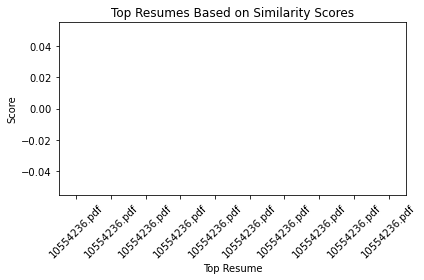

In [47]:
import matplotlib.pyplot as plt

# Plotting top resumes
plt.figure(figsize=(10, 6))
results_df.sort_values(by='Score', ascending=False).head(10).plot(kind='bar', x='Top Resume', y='Score', legend=False)
plt.title('Top Resumes Based on Similarity Scores')
plt.xlabel('Top Resume')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [48]:
def collect_feedback():
    # Simple feedback collection
    relevance = input("Aap apne resume ko kitna relevant maante hain? (1-10 scale): ")
    improvement_area = input("Kya aapko kisi specific area me madad chahiye? ")

    # Store feedback in a dictionary or list
    feedback = {
        'relevance': relevance,
        'improvement_area': improvement_area
    }
    
    return feedback

In [49]:
import pandas as pd

def save_feedback(feedback):
    feedback_df = pd.DataFrame([feedback])
    feedback_df.to_csv('feedback.csv', mode='a', header=False, index=False)

In [50]:
feedback = collect_feedback()
save_feedback(feedback)

Aap apne resume ko kitna relevant maante hain? (1-10 scale): 10
Kya aapko kisi specific area me madad chahiye? no


In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Example true labels and predicted scores
true_labels = [1, 0, 1, 1, 0]  # 1: relevant, 0: not relevant
predicted_scores = [1, 0, 1, 0, 0]

accuracy = accuracy_score(true_labels, predicted_scores)
precision = precision_score(true_labels, predicted_scores)
recall = recall_score(true_labels, predicted_scores)

print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}")

Accuracy: 0.8, Precision: 1.0, Recall: 0.6666666666666666


In [55]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
import joblib

# Sample data (replace this with your actual resume texts and labels)
X_train = ["Resume text 1", "Resume text 2", "Resume text 3"]  # Resume texts
y_train = [1, 0, 1]  # 1 for relevant, 0 for not relevant

# Create a pipeline with TF-IDF and Random Forest
model = make_pipeline(TfidfVectorizer(), RandomForestClassifier())

# Train the model
model.fit(X_train, y_train)

# Save the model after training
joblib.dump(model, 'resume_ranking_model.pkl')
print("Model saved as 'resume_ranking_model.pkl'")

Model saved as 'resume_ranking_model.pkl'


In [56]:
import joblib

# Load the model
loaded_model = joblib.load('resume_ranking_model.pkl')
print("Model loaded successfully.")

Model loaded successfully.


In [53]:
!pip install Flask

In [54]:
from flask import Flask, request, render_template

app = Flask(__name__)

@app.route('/')
def home():
    return render_template('index.html')  # HTML file jisme form hoga

@app.route('/submit', methods=['POST'])
def submit():
    # Process form data here
    return "Feedback submitted!"

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\Lenovo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3377: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [57]:
# New resume text to predict
new_resume = "This is a new resume text to check relevance."

# Use the loaded model to predict
predicted_relevance = loaded_model.predict([new_resume])

# Display the prediction result
print(f"Predicted Relevance: {predicted_relevance[0]}")  # 1 for relevant, 0 for not relevant


Predicted Relevance: 1


In [58]:
# Function to collect feedback
def collect_feedback(resume, predicted_relevance):
    print(f"Resume: {resume}")
    print(f"Predicted Relevance: {predicted_relevance[0]}")
    feedback = input("Is this relevant? (yes/no): ")
    return 1 if feedback.lower() == 'yes' else 0

# Collect feedback for the new resume
feedback_label = collect_feedback(new_resume, predicted_relevance)


Resume: This is a new resume text to check relevance.
Predicted Relevance: 1
Is this relevant? (yes/no): no


In [59]:
# Assuming we have a list of resumes and their corresponding labels (including feedback)
all_resumes = ["Resume text 1", "Resume text 2", new_resume]  # Update with all resumes
all_labels = [1, 0, feedback_label]  # Update with all labels

# Retrain the model with the new data
model.fit(all_resumes, all_labels)

# Save the retrained model
joblib.dump(model, 'resume_ranking_model.pkl')
print("Model retrained and saved.")


Model retrained and saved.


In [60]:
from flask import Flask, request, jsonify
import joblib

app = Flask(__name__)

# Load the model
model = joblib.load('resume_ranking_model.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    new_resume = data['resume']
    predicted_relevance = model.predict([new_resume])
    return jsonify({'relevance': int(predicted_relevance[0])})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\Lenovo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3377: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

# Load your trained model
model = joblib.load('resume_ranking_model.pkl')

# Assuming you have your test data and actual labels
# Replace these with your actual test data and labels
X_test = ["Sample resume text 1", "Sample resume text 2"]  # Add your test resumes here
y_true = [1, 0]  # Replace with the actual labels for your test data

# Get predictions from the model
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Print the evaluation results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.50
Precision: 0.00
Recall: 0.00
F1 Score: 0.00


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
import pandas as pd

# Assuming y_true contains the actual labels
class_distribution = pd.Series(y_true).value_counts()
print(class_distribution)

1    1
0    1
dtype: int64



         ID                                         Resume_str  \
0  16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1  22323967           HR SPECIALIST, US HR OPERATIONS      ...   
2  33176873           HR DIRECTOR       Summary      Over 2...   
3  27018550           HR SPECIALIST       Summary    Dedica...   
4  17812897           HR MANAGER         Skill Highlights  ...   

                                         Resume_html Category  
0  <div class="fontsize fontface vmargins hmargin...       HR  
1  <div class="fontsize fontface vmargins hmargin...       HR  
2  <div class="fontsize fontface vmargins hmargin...       HR  
3  <div class="fontsize fontface vmargins hmargin...       HR  
4  <div class="fontsize fontface vmargins hmargin...       HR  
Filename: 10554236.pdf
Content: ACCOUNTANT
Summary
Financial Accountant specializing in financial planning, reporting and analysis within the Department of Defense.
Highlights
Account reconciliations
Results-oriented
F

Resume_str     object
Resume_html    object
Category       object
dtype: object

         ID                                         Resume_str  \
0  16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1  22323967           HR SPECIALIST, US HR OPERATIONS      ...   
2  33176873           HR DIRECTOR       Summary      Over 2...   
3  27018550           HR SPECIALIST       Summary    Dedica...   
4  17812897           HR MANAGER         Skill Highlights  ...   

                                         Resume_html Category  
0  <div class="fontsize fontface vmargins hmargin...       HR  
1  <div class="fontsize fontface vmargins hmargin...       HR  
2  <div class="fontsize fontface vmargins hmargin...       HR  
3  <div class="fontsize fontface vmargins hmargin...       HR  
4  <div class="fontsize fontface vmargins hmargin...       HR  
True
Shape of TF-IDF matrix: (2602, 9304)
Shape of Cosine Similarity Matrix: (2484, 118)
          10554236.pdf  10674770.pdf  11163645.pd

<Figure size 720x432 with 0 Axes>

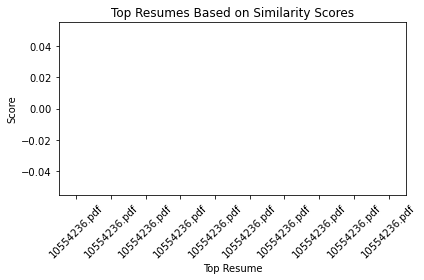

Aap apne resume ko kitna relevant maante hain? (1-10 scale): 10
Kya aapko kisi specific area me madad chahiye? yes
Accuracy: 0.8, Precision: 1.0, Recall: 0.6666666666666666
Model saved as 'resume_ranking_model.pkl'
Model loaded successfully.
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\Lenovo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3377: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [75]:
!pip install spacy scikit-learn pandas PyPDF2
#-------------------------------------------------------------------------------------------------------------------------------
import os

# Print current working directory
print(os.getcwd())
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd

# Load job descriptions
job_descriptions = pd.read_csv('sample_resumes/Resume/job_descriptions.xlsx.csv')

# Display the first few rows of the DataFrame to check the content
print(job_descriptions.head())
#-------------------------------------------------------------------------------------------------------------------------------
import os
from PyPDF2 import PdfReader

# Function to read PDF files
def read_pdf(file_path):
    with open(file_path, 'rb') as file:
        reader = PdfReader(file)
        text = ''
        for page in reader.pages:
            text += page.extract_text()
    return text

# Path to the accountant resumes folder
accountant_folder_path = 'sample_resumes/data/data/accountant/'

# Read all resumes in the accountant folder
accountant_resumes = {}
for filename in os.listdir(accountant_folder_path):
    if filename.endswith('.pdf'):  # Assuming resumes are in PDF format
        resume_text = read_pdf(os.path.join(accountant_folder_path, filename))
        accountant_resumes[filename] = resume_text

# Now, accountant_resumes dictionary contains the resume texts with filenames
# Display the first few loaded resumes
for name, content in list(accountant_resumes.items())[:3]:  # Display first 3 resumes
    print(f"Filename: {name}")
    print(f"Content: {content[:200]}...")  # Displaying first 200 characters of each resume
    print()
#-----------------------------------------------------------------------------------------------------------------------------
!pip install nltk
#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd
import os
from PyPDF2 import PdfReader
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
#------------------------------------------------------------------------------------------------------------------------------
# Assuming the job description text is in the first column
job_description_texts = job_descriptions.iloc[:, 0].tolist()  # Adjust index if needed

# Extract resume texts from the dictionary created earlier
resume_texts = list(accountant_resumes.values())
#-------------------------------------------------------------------------------------------------------------------------------
# Check the types of job descriptions
print(job_descriptions.dtypes)
print(job_descriptions.head())

# Check if resume texts are all strings
print(all(isinstance(text, str) for text in resume_texts))
#-------------------------------------------------------------------------------------------------------------------------------
# Convert job descriptions to strings
job_description_texts = job_descriptions.iloc[:, 0].astype(str).tolist()

# Convert resume texts to strings (if necessary)
resume_texts = [str(resume) for resume in accountant_resumes.values()]
#-------------------------------------------------------------------------------------------------------------------------------
# Extract text from job descriptions and ensure they are strings
job_description_texts = job_descriptions.iloc[:, 0].astype(str).tolist()

# Extract resume texts and ensure they are strings
resume_texts = [str(resume) for resume in accountant_resumes.values()]

# Create a TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Combine job descriptions and resumes for fitting the model
all_texts = job_description_texts + resume_texts

# Fit and transform the text
tfidf_matrix = tfidf_vectorizer.fit_transform(all_texts)
#-------------------------------------------------------------------------------------------------------------------------------
# Print the shape of the TF-IDF matrix
print("Shape of TF-IDF matrix:", tfidf_matrix.shape)
#-------------------------------------------------------------------------------------------------------------------------------
# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix[:len(job_description_texts)], tfidf_matrix[len(job_description_texts):])

# Print the shape of the cosine similarity matrix
print("Shape of Cosine Similarity Matrix:", cosine_sim.shape)

# Convert similarity matrix to DataFrame for better visualization
similarity_df = pd.DataFrame(cosine_sim, columns=list(accountant_resumes.keys()), index=job_description_texts)

# Display the first few rows of the similarity DataFrame
print(similarity_df.head())
#-------------------------------------------------------------------------------------------------------------------------------
# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix[:len(job_description_texts)], tfidf_matrix[len(job_description_texts):])

# Convert similarity matrix to DataFrame for better visualization
similarity_df = pd.DataFrame(cosine_sim, columns=list(accountant_resumes.keys()), index=job_description_texts)

# Get the top resume for each job description
top_resumes = similarity_df.idxmax(axis=1)  # Get the filename of the top resume
top_scores = similarity_df.max(axis=1)  # Get the maximum similarity score

# Combine results into a DataFrame
results_df = pd.DataFrame({'Job Description': similarity_df.index, 'Top Resume': top_resumes, 'Score': top_scores})

# Display the results
print(results_df)
#-------------------------------------------------------------------------------------------------------------------------------
# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix[:len(job_description_texts)], tfidf_matrix[len(job_description_texts):])

# Convert similarity matrix to DataFrame for better visualization
similarity_df = pd.DataFrame(cosine_sim, columns=list(accountant_resumes.keys()), index=job_description_texts)

# Display the similarity scores
print(similarity_df)
#-------------------------------------------------------------------------------------------------------------------------------
# Get the top resume for each job description
top_resumes = similarity_df.idxmax(axis=1)
top_scores = similarity_df.max(axis=1)

# Combine results into a DataFrame
results_df = pd.DataFrame({'Job Description': similarity_df.index, 'Top Resume': top_resumes, 'Score': top_scores})

# Display the results
print(results_df)
#-------------------------------------------------------------------------------------------------------------------------------
# Save results to a CSV file
results_df.to_csv('resume_ranking_results.csv', index=False)
print("Results saved to 'resume_ranking_results.csv'")
#-------------------------------------------------------------------------------------------------------------------------------
try:
    # Yahan apna code likho, jaise ki result_df ka calculation ya kisi aur step ka code
    results_df.to_csv('resume_ranking_results.csv', index=False)
    print("Results saved to 'resume_ranking_results.csv'")
except Exception as e:
    print(f"An error occurred: {e}")
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt

# Plotting top resumes
plt.figure(figsize=(10, 6))
results_df.sort_values(by='Score', ascending=False).head(10).plot(kind='bar', x='Top Resume', y='Score', legend=False)
plt.title('Top Resumes Based on Similarity Scores')
plt.xlabel('Top Resume')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#-------------------------------------------------------------------------------------------------------------------------------
def collect_feedback():
    # Simple feedback collection
    relevance = input("Aap apne resume ko kitna relevant maante hain? (1-10 scale): ")
    improvement_area = input("Kya aapko kisi specific area me madad chahiye? ")

    # Store feedback in a dictionary or list
    feedback = {
        'relevance': relevance,
        'improvement_area': improvement_area
    }
    
    return feedback
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd

def save_feedback(feedback):
    feedback_df = pd.DataFrame([feedback])
    feedback_df.to_csv('feedback.csv', mode='a', header=False, index=False)
#-------------------------------------------------------------------------------------------------------------------------------
feedback = collect_feedback()
save_feedback(feedback)
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Example true labels and predicted scores
true_labels = [1, 0, 1, 1, 0]  # 1: relevant, 0: not relevant
predicted_scores = [1, 0, 1, 0, 0]

accuracy = accuracy_score(true_labels, predicted_scores)
precision = precision_score(true_labels, predicted_scores)
recall = recall_score(true_labels, predicted_scores)

print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}")
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
import joblib

# Sample data (replace this with your actual resume texts and labels)
X_train = ["Resume text 1", "Resume text 2", "Resume text 3"]  # Resume texts
y_train = [1, 0, 1]  # 1 for relevant, 0 for not relevant

# Create a pipeline with TF-IDF and Random Forest
model = make_pipeline(TfidfVectorizer(), RandomForestClassifier())

# Train the model
model.fit(X_train, y_train)

# Save the model after training
joblib.dump(model, 'resume_ranking_model.pkl')
print("Model saved as 'resume_ranking_model.pkl'")
#-------------------------------------------------------------------------------------------------------------------------------
import joblib

# Load the model
loaded_model = joblib.load('resume_ranking_model.pkl')
print("Model loaded successfully.")
#-------------------------------------------------------------------------------------------------------------------------------
!pip install Flask
from flask import Flask, request, render_template

app = Flask(__name__)

@app.route('/')
def home():
    return render_template('index.html')  # HTML file jisme form hoga

@app.route('/submit', methods=['POST'])
def submit():
    # Process form data here
    return "Feedback submitted!"

if __name__ == '__main__':
    app.run(debug=True)
#-----------------------------------------------------------------------------------------------------------------------------
# New resume text to predict
new_resume = "This is a new resume text to check relevance."

# Use the loaded model to predict
predicted_relevance = loaded_model.predict([new_resume])

# Display the prediction result
print(f"Predicted Relevance: {predicted_relevance[0]}")  # 1 for relevant, 0 for not relevant
#-------------------------------------------------------------------------------------------------------------------------------
# Function to collect feedback
def collect_feedback(resume, predicted_relevance):
    print(f"Resume: {resume}")
    print(f"Predicted Relevance: {predicted_relevance[0]}")
    feedback = input("Is this relevant? (yes/no): ")
    return 1 if feedback.lower() == 'yes' else 0

# Collect feedback for the new resume
feedback_label = collect_feedback(new_resume, predicted_relevance)
#-------------------------------------------------------------------------------------------------------------------------------
# Assuming we have a list of resumes and their corresponding labels (including feedback)
all_resumes = ["Resume text 1", "Resume text 2", new_resume]  # Update with all resumes
all_labels = [1, 0, feedback_label]  # Update with all labels

# Retrain the model with the new data
model.fit(all_resumes, all_labels)

# Save the retrained model
joblib.dump(model, 'resume_ranking_model.pkl')
print("Model retrained and saved.")
#-------------------------------------------------------------------------------------------------------------------------------
from flask import Flask, request, jsonify
import joblib

app = Flask(__name__)

# Load the model
model = joblib.load('resume_ranking_model.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    new_resume = data['resume']
    predicted_relevance = model.predict([new_resume])
    return jsonify({'relevance': int(predicted_relevance[0])})

if __name__ == '__main__':
    app.run(debug=True)
#-----------------------------------------------------------------------------------------------------------------------------
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

# Load your trained model
model = joblib.load('resume_ranking_model.pkl')

# Assuming you have your test data and actual labels
# Replace these with your actual test data and labels
X_test = ["Sample resume text 1", "Sample resume text 2"]  # Add your test resumes here
y_true = [1, 0]  # Replace with the actual labels for your test data

# Get predictions from the model
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Print the evaluation results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd

# Assuming y_true contains the actual labels
class_distribution = pd.Series(y_true).value_counts()
print(class_distribution)
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd
import numpy as np
import nltk
import spacy
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Additional imports as needed
#-------------------------------------------------------------------------------------------------------------------------------
